50000 train samples
10000 tune samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 96us/step - loss: 0.0279 - acc: 0.8567 - val_loss: 0.0146 - val_acc: 0.9229
Epoch 2/5
50000/50000 [==============================] - 5s 95us/step - loss: 0.0144 - acc: 0.9206 - val_loss: 0.0115 - val_acc: 0.9357
Epoch 3/5
50000/50000 [==============================] - 5s 95us/step - loss: 0.0112 - acc: 0.9372 - val_loss: 0.0096 - val_acc: 0.9477
Epoch 4/5
50000/

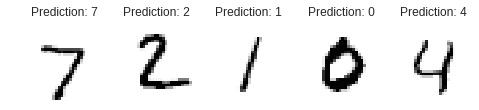

In [3]:
'''
keras_mnist_sigmoid_val.py

Trains a simple deep NN on the MNIST dataset.
Uses a simple sigmoid activation fucntion and MSE loss. 
Uses a separate validation/tuning set to determine best model.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_tune = x_train[50000:60000]
x_train = x_train[0:50000]
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_tune = x_tune.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_tune /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_tune.shape[0], 'tune samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_tune = keras.utils.to_categorical(y_train[50000:60000], num_classes)
y_train = keras.utils.to_categorical(y_train[0:50000], num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
#model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='mean_squared_error',
#model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_tune, y_tune))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(x_test, verbose=0)
for i in range(5):
    subplt = plt.subplot(int(i / 5) + 1, 5, i + 1)
    # no sense in showing labels if they don't match the letter
    hot_index = np.argmax(predictions[i])
    subplt.set_title('Prediction: {0}'.format(hot_index))
    subplt.axis('off')
    letter = x_test[i]
    subplt.matshow(np.reshape(letter, [28, 28]))
    plt.draw()
    
plt.show()